In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/Salary Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [3]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [5]:
data['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [6]:
data['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [7]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
data['Gender'] = data['Gender'].astype('category').cat.codes
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,0,Master's,Data Analyst,3.0,65000.0
2,45.0,1,PhD,Senior Manager,15.0,150000.0
3,36.0,0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,1,Master's,Director,20.0,200000.0


In [9]:
data['Education Level'] = pd.Categorical(data['Education Level']).codes
data['Job Title'] = pd.Categorical(data['Job Title']).codes


<Axes: >

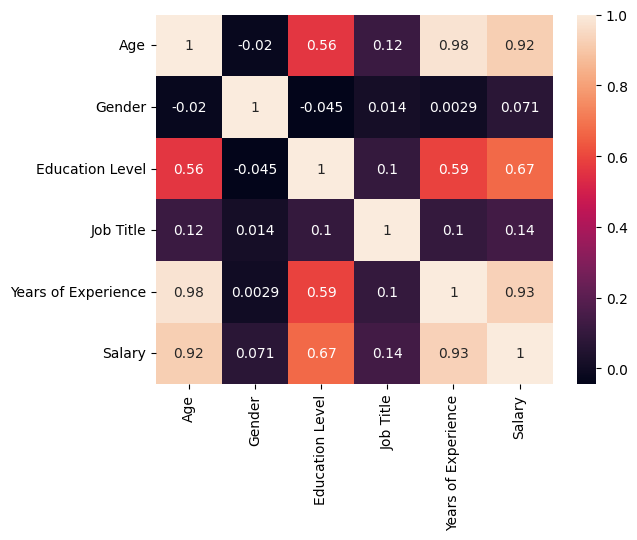

In [10]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

In [11]:
data = data.drop(['Gender'],axis=1)

In [12]:
data.describe()

,Age,Education Level,Job Title,Years of Experience,Salary
count,373.000000,373.000000,373.000000,373.000000,373.000000
mean,37.431635,0.536193,89.954424,10.030831,100577.345845
std,7.069073,0.723569,46.511423,6.557007,48240.013482
min,23.000000,0.000000,0.000000,0.000000,350.000000
25%,31.000000,0.000000,50.000000,4.000000,55000.000000
50%,36.000000,0.000000,95.000000,9.000000,95000.000000
75%,44.000000,1.000000,132.000000,15.000000,140000.000000
max,53.000000,2.000000,173.000000,25.000000,250000.000000


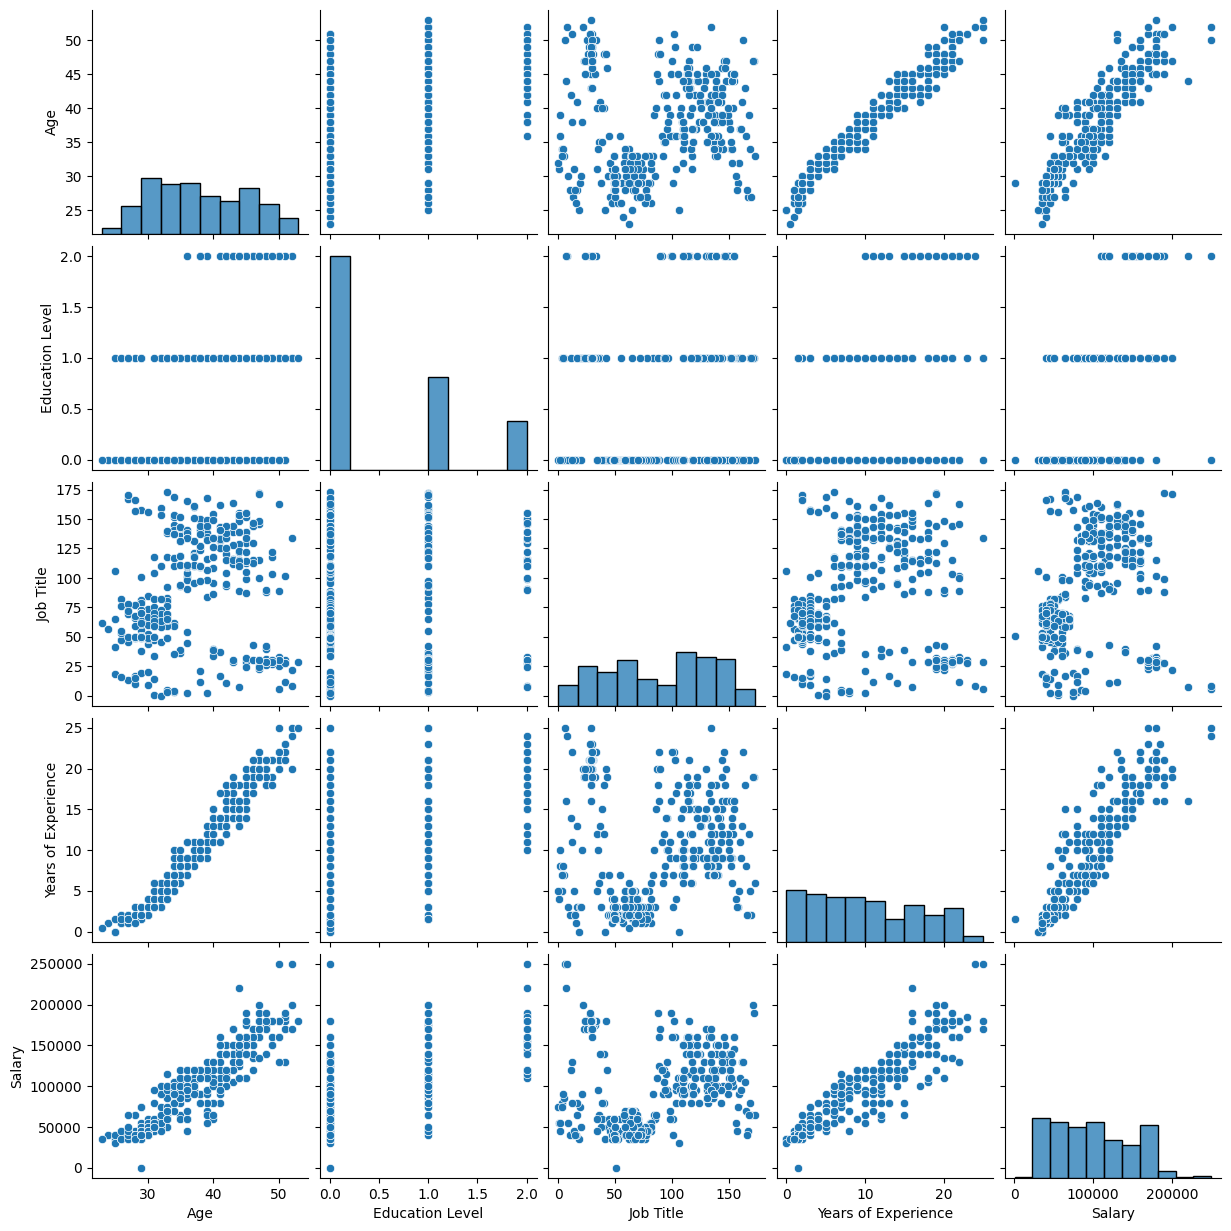

In [13]:

sns.pairplot(data)

In [14]:
x = data.drop(['Salary'],axis=1)
y= data['Salary']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred = model.predict(x_test)

In [19]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_test,y_pred)
mean_absolute_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)

251910268.7471274

In [20]:
print("R2 Score:", r2_score(y_test,y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))


R2 Score: 0.8941332739431104
Mean Absolute Error: 11904.675512237336
Mean Squared Error: 251910268.7471274


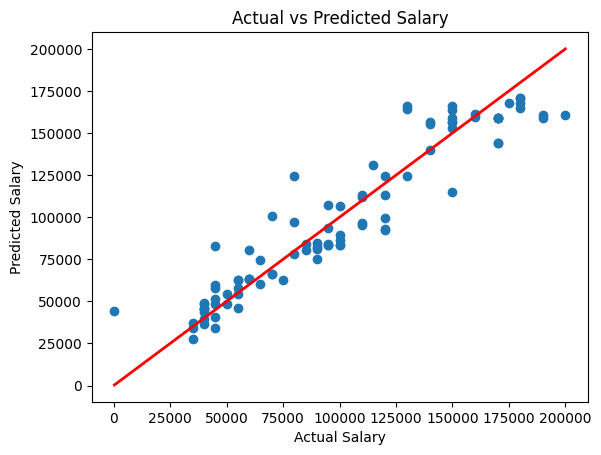

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='red', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()